<a href="https://colab.research.google.com/github/devbernardes/Telecom-X/blob/main/telecomX_1_e_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXTRA√á√ÉO DOS DADOS**

In [ ]:
import pandas as pd
import requests

# 1. URL para os dados brutos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

# 2. Fazendo a requisi√ß√£o e obtendo os dados
response = requests.get(url)
dados_json = response.json()

# 3. Usar json_normalize para "achatar" os dados e criar o DataFrame
df = pd.json_normalize(dados_json)

# 4. Verificar o resultado
print("DataFrame 'achatado' com sucesso! ‚úÖ")
print("\nNovas colunas do DataFrame:")
print(df.columns)

print("\nAs 5 primeiras linhas do DataFrame corrigido:")
display(df.head())

DataFrame 'achatado' com sucesso! ‚úÖ

Novas colunas do DataFrame:
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

As 5 primeiras linhas do DataFrame corrigido:


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

# **Explorar a Estrutura e os Tipos de Dados**

In [ ]:
print("--- An√°lise da Estrutura do DataFrame ---")
df.info()

print("\n--- Verificando as Dimens√µes (Linhas, Colunas) ---")
print(df.shape)

--- An√°lise da Estrutura do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  inter

In [ ]:
print(df.columns)


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


# **Verificando Inconsist√™ncias nos Dados**

**Corrigindo Erros de Formata√ß√£o**

In [ ]:
print("Tipo de dado de 'account.Charges.Total' ANTES da convers√£o:", df['account.Charges.Total'].dtype)

# Converter a coluna para num√©rico.
# errors='coerce' transforma valores problem√°ticos (ex: " ") em NaN (Not a Number)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

print("Tipo de dado de 'account.Charges.Total' DEPOIS da convers√£o:", df['account.Charges.Total'].dtype)

Tipo de dado de 'account.Charges.Total' ANTES da convers√£o: object
Tipo de dado de 'account.Charges.Total' DEPOIS da convers√£o: float64


**Tratando Valores Ausentes (NaN)**

In [ ]:
# Verificar a quantidade de valores ausentes em cada coluna
print("\n--- Contagem de Valores Ausentes por Coluna ---")
print(df.isnull().sum())


--- Contagem de Valores Ausentes por Coluna ---
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [ ]:
# Removendo as linhas com valores ausentes
print(f"\nTamanho do DataFrame ANTES de remover os nulos: {df.shape}")
df.dropna(inplace=True)
print(f"Tamanho do DataFrame DEPOIS de remover os nulos: {df.shape}")

# Verifica√ß√£o final de valores ausentes
print("\n--- Verifica√ß√£o Final de Valores Ausentes ---")
print(df.isnull().sum().any()) # Retornar√° False se n√£o houver mais nenhum valor nulo


Tamanho do DataFrame ANTES de remover os nulos: (7267, 21)
Tamanho do DataFrame DEPOIS de remover os nulos: (7256, 21)

--- Verifica√ß√£o Final de Valores Ausentes ---
False


**Verificando Dados Duplicados**

In [ ]:
# Contar a quantidade de linhas duplicadas
duplicatas = df.duplicated().sum()
print(f"\n--- Verifica√ß√£o de Duplicatas ---")
print(f"Quantidade de linhas duplicadas encontradas: {duplicatas}")

# Se houvesse duplicatas, o comando para remov√™-las seria:
# df.drop_duplicates(inplace=True)


--- Verifica√ß√£o de Duplicatas ---
Quantidade de linhas duplicadas encontradas: 0


**Verificando Inconsist√™ncias nas Categorias**

In [ ]:
# Selecionando apenas as colunas do tipo 'object' (texto)
colunas_categoricas = df.select_dtypes(include=['object']).columns

print("\n--- Verificando Valores √önicos nas Colunas Categ√≥ricas ---")
for coluna in colunas_categoricas:
    # Ignorar a customerID pois cada valor √© √∫nico
    if coluna != 'customerID':
        print(f"Coluna '{coluna}': {df[coluna].unique()}")


--- Verificando Valores √önicos nas Colunas Categ√≥ricas ---
Coluna 'Churn': ['No' 'Yes' '']
Coluna 'customer.gender': ['Female' 'Male']
Coluna 'customer.Partner': ['Yes' 'No']
Coluna 'customer.Dependents': ['Yes' 'No']
Coluna 'phone.PhoneService': ['Yes' 'No']
Coluna 'phone.MultipleLines': ['No' 'Yes' 'No phone service']
Coluna 'internet.InternetService': ['DSL' 'Fiber optic' 'No']
Coluna 'internet.OnlineSecurity': ['No' 'Yes' 'No internet service']
Coluna 'internet.OnlineBackup': ['Yes' 'No' 'No internet service']
Coluna 'internet.DeviceProtection': ['No' 'Yes' 'No internet service']
Coluna 'internet.TechSupport': ['Yes' 'No' 'No internet service']
Coluna 'internet.StreamingTV': ['Yes' 'No' 'No internet service']
Coluna 'internet.StreamingMovies': ['No' 'Yes' 'No internet service']
Coluna 'account.Contract': ['One year' 'Month-to-month' 'Two year']
Coluna 'account.PaperlessBilling': ['Yes' 'No']
Coluna 'account.PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automat

# **Coluna de Contas Di√°rias**

In [ ]:
# com o DataFrame 'df' j√° limpo e carregado

# Passo 1: Definir o n√∫mero m√©dio de dias em um m√™s
DIAS_NO_MES = 30.44

# Passo 2: Confirmar o nome exato da coluna de faturamento mensal

# print(df.columns)
coluna_faturamento_mensal = 'account.Charges.Monthly'

# Passo 3: Criar a nova coluna "Contas_Diarias"

# A opera√ß√£o √© feita de forma vetorizada, ou seja, o Pandas aplica a divis√£o em todas as linhas de uma vez.
df['Contas_Diarias'] = df[coluna_faturamento_mensal] / DIAS_NO_MES

# Passo 4: Verificar o resultado
print("Coluna 'Contas_Diarias' criada com sucesso! ‚úÖ")

# Exibir a coluna original e a nova coluna para compara√ß√£o (Isso ajuda a validar se o c√°lculo faz sentido.)

print("\nExibindo as primeiras 5 linhas com os valores mensais e di√°rios:")
display(df[[coluna_faturamento_mensal, 'Contas_Diarias']].head())

Coluna 'Contas_Diarias' criada com sucesso! ‚úÖ

Exibindo as primeiras 5 linhas com os valores mensais e di√°rios:


account.Charges.Monthly  Contas_Diarias
0                     65.6        2.155059
1                     59.9        1.967806
2                     73.9        2.427727
3                     98.0        3.219448
4                     83.9        2.756242

# **Padroniza√ß√£o e Transforma√ß√£o de Dados**

**Renomeando Colunas para Maior Clareza**

In [ ]:
# Dicion√°rio para mapear os nomes antigos para os novos
mapa_colunas = {
    'customerID': 'ID_Cliente',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Possui_Parceiro',
    'customer.Dependents': 'Possui_Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefonico',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Sem_Papel',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Cobranca_Mensal',
    'account.Charges.Total': 'Cobranca_Total',
    'Churn': 'Evasao',
}

# Renomear as colunas usando o dicion√°rio
df.rename(columns=mapa_colunas, inplace=True)

# Verificar o resultado
print("Colunas renomeadas com sucesso! ‚úÖ")
display(df.head())

Colunas renomeadas com sucesso! ‚úÖ


ID_Cliente Evasao  Genero  Idoso Possui_Parceiro Possui_Dependentes  \
0  0002-ORFBO     No  Female      0             Yes                Yes   
1  0003-MKNFE     No    Male      0              No                 No   
2  0004-TLHLJ    Yes    Male      0              No                 No   
3  0011-IGKFF    Yes    Male      1             Yes                 No   
4  0013-EXCHZ    Yes  Female      1             Yes                 No   

   Meses_Contrato Servico_Telefonico Multiplas_Linhas Servico_Internet  ...  \
0               9                Yes               No              DSL  ...   
1               9                Yes              Yes              DSL  ...   
2               4                Yes               No      Fiber optic  ...   
3              13                Yes               No      Fiber optic  ...   
4               3                Yes               No      Fiber optic  ...   

  Protecao_Dispositivo Suporte_Tecnico Streaming_TV Streaming_Filmes  \
0                   No             Yes          Yes               No   
1                   No              No           No              Yes   
2                  Yes              No           No               No   
3                  Yes              No          Yes              Yes   
4                   No             Yes          Yes               No   

    Tipo_Contrato Fatura_Sem_Papel  Metodo_Pagamento Cobranca_Mensal  \
0        One year              Yes      Mailed check            65.6   
1  Month-to-month               No      Mailed check            59.9   
2  Month-to-month              Yes  Electronic check            73.9   
3  Month-to-month              Yes  Electronic check            98.0   
4  Month-to-month              Yes      Mailed check            83.9   

  Cobranca_Total  Contas_Diarias  
0         593.30        2.155059  
1         542.40        1.967806  
2         280.85        2.427727  
3        1237.85        3.219448  
4         267.40        2.756242  

[5 rows x 22 columns]

**Transformando Dados (Encoding)**

In [ ]:
# A coluna 'Idoso' j√° est√° no formato 0/1, ent√£o n√£o precisamos mexer nela.
print("Valores √∫nicos na coluna 'Idoso':", df['Idoso'].unique())

# Mapear 'Sim'/'N√£o' para 1/0
colunas_binarias = [
    'Possui_Parceiro', 'Possui_Dependentes', 'Servico_Telefonico',
    'Fatura_Sem_Papel', 'Evasao'
]

mapa_sim_nao = {'Yes': 1, 'No': 0}

for coluna in colunas_binarias:
    df[coluna] = df[coluna].map(mapa_sim_nao)

# Mapear G√™nero
df['Genero'] = df['Genero'].map({'Male': 0, 'Female': 1})

print("\nColunas bin√°rias convertidas para 1 e 0! ‚úÖ")
display(df[['Genero', 'Possui_Parceiro', 'Evasao']].head())

Valores √∫nicos na coluna 'Idoso': [0 1]

Colunas bin√°rias convertidas para 1 e 0! ‚úÖ


Genero  Possui_Parceiro  Evasao
0       1                1     0.0
1       0                0     0.0
2       0                0     1.0
3       0                1     1.0
4       1                1     1.0

In [ ]:
# Colunas a serem transformadas com One-Hot Encoding
colunas_multiplas = [
    'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online',
    'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Tipo_Contrato', 'Metodo_Pagamento'
]

# Usando pd.get_dummies para aplicar o One-Hot Encoding
# drop_first=True remove a primeira categoria de cada grupo para evitar redund√¢ncia de dados
df_transformado = pd.get_dummies(df, columns=colunas_multiplas, drop_first=True)

print("\nDataFrame ap√≥s One-Hot Encoding! ‚úÖ")
print("Dimens√µes do novo DataFrame:", df_transformado.shape)
display(df_transformado.head())


DataFrame ap√≥s One-Hot Encoding! ‚úÖ
Dimens√µes do novo DataFrame: (7256, 33)


ID_Cliente  Evasao  Genero  Idoso  Possui_Parceiro  Possui_Dependentes  \
0  0002-ORFBO     0.0       1      0                1                   1   
1  0003-MKNFE     0.0       0      0                0                   0   
2  0004-TLHLJ     1.0       0      0                0                   0   
3  0011-IGKFF     1.0       0      1                1                   0   
4  0013-EXCHZ     1.0       1      1                1                   0   

   Meses_Contrato  Servico_Telefonico  Fatura_Sem_Papel  Cobranca_Mensal  ...  \
0               9                   1                 1             65.6  ...   
1               9                   1                 0             59.9  ...   
2               4                   1                 1             73.9  ...   
3              13                   1                 1             98.0  ...   
4               3                   1                 1             83.9  ...   

   Suporte_Tecnico_Yes  Streaming_TV_No internet service  Streaming_TV_Yes  \
0                 True                             False              True   
1                False                             False             False   
2                False                             False             False   
3                False                             False              True   
4                 True                             False              True   

   Streaming_Filmes_No internet service  Streaming_Filmes_Yes  \
0                                 False                 False   
1                                 False                  True   
2                                 False                 False   
3                                 False                  True   
4                                 False                 False   

   Tipo_Contrato_One year  Tipo_Contrato_Two year  \
0                    True                   False   
1                   False                   False   
2                   False                   False   
3                   False                   False   
4                   False                   False   

   Metodo_Pagamento_Credit card (automatic)  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   Metodo_Pagamento_Electronic check  Metodo_Pagamento_Mailed check  
0                              False                           True  
1                              False                           True  
2                               True                          False  
3                               True                          False  
4                              False                           True  

[5 rows x 33 columns]

# **An√°lise Descritiva**

**An√°lise Descritiva Geral**

In [ ]:
# O .T transp√µe a sa√≠da, o que facilita a leitura quando h√° muitas colunas
print("--- Estat√≠sticas Descritivas Gerais ---")
display(df_transformado.describe().T)

--- Estat√≠sticas Descritivas Gerais ---


count         mean          std       min         25%  \
Evasao              7032.0     0.265785     0.441782   0.00000    0.000000   
Genero              7256.0     0.494350     0.500003   0.00000    0.000000   
Idoso               7256.0     0.162900     0.369300   0.00000    0.000000   
Possui_Parceiro     7256.0     0.483600     0.499765   0.00000    0.000000   
Possui_Dependentes  7256.0     0.299063     0.457879   0.00000    0.000000   
Meses_Contrato      7256.0    32.395535    24.558067   1.00000    9.000000   
Servico_Telefonico  7256.0     0.902839     0.296197   0.00000    1.000000   
Fatura_Sem_Papel    7256.0     0.593716     0.491173   0.00000    0.000000   
Cobranca_Mensal     7256.0    64.755423    30.125739  18.25000   35.450000   
Cobranca_Total      7256.0  2280.634213  2268.632997  18.80000  400.225000   
Contas_Diarias      7256.0     2.127314     0.989676   0.59954    1.164586   

                            50%          75%          max  
Evasao                 0.000000     1.000000     1.000000  
Genero                 0.000000     1.000000     1.000000  
Idoso                  0.000000     0.000000     1.000000  
Possui_Parceiro        0.000000     1.000000     1.000000  
Possui_Dependentes     0.000000     1.000000     1.000000  
Meses_Contrato        29.000000    55.000000    72.000000  
Servico_Telefonico     1.000000     1.000000     1.000000  
Fatura_Sem_Papel       1.000000     1.000000     1.000000  
Cobranca_Mensal       70.300000    89.900000   118.750000  
Cobranca_Total      1391.000000  3785.300000  8684.800000  
Contas_Diarias         2.309461     2.953351     3.901117

**An√°lise Descritiva por Segmento (Churn vs. N√£o Churn)**

In [ ]:
# Agrupando por 'Evasao' e calcular a m√©dia para as colunas mais relevantes
analise_por_evasao = df_transformado.groupby('Evasao')[['Meses_Contrato', 'Cobranca_Mensal', 'Contas_Diarias']].mean().round(2)

print("\n--- An√°lise Comparativa por Status de Evas√£o (M√©dias) ---")
display(analise_por_evasao)


--- An√°lise Comparativa por Status de Evas√£o (M√©dias) ---


Meses_Contrato  Cobranca_Mensal  Contas_Diarias
Evasao                                                 
0.0              37.65            61.31            2.01
1.0              17.98            74.44            2.45

**An√°lise de Correla√ß√£o**


--- Correla√ß√£o das Vari√°veis com a Evas√£o ---


Evasao                                      1.000000
Servico_Internet_Fiber optic                0.307463
Metodo_Pagamento_Electronic check           0.301455
Contas_Diarias                              0.192858
Cobranca_Mensal                             0.192858
Fatura_Sem_Papel                            0.191454
Idoso                                       0.150541
Streaming_TV_Yes                            0.063254
Streaming_Filmes_Yes                        0.060860
Multiplas_Linhas_Yes                        0.040033
Servico_Telefonico                          0.011691
Genero                                      0.008545
Multiplas_Linhas_No phone service          -0.011691
Protecao_Dispositivo_Yes                   -0.066193
Backup_Online_Yes                          -0.082307
Metodo_Pagamento_Mailed check              -0.090773
Metodo_Pagamento_Credit card (automatic)   -0.134687
Possui_Parceiro                            -0.149982
Possui_Dependentes                         -0.163128
Suporte_Tecnico_Yes                        -0.164716
Seguranca_Online_Yes                       -0.171270
Tipo_Contrato_One year                     -0.178225
Cobranca_Total                             -0.199484
Servico_Internet_No                        -0.227578
Streaming_TV_No internet service           -0.227578
Seguranca_Online_No internet service       -0.227578
Backup_Online_No internet service          -0.227578
Protecao_Dispositivo_No internet service   -0.227578
Streaming_Filmes_No internet service       -0.227578
Suporte_Tecnico_No internet service        -0.227578
Tipo_Contrato_Two year                     -0.301552
Meses_Contrato                             -0.354049
Name: Evasao, dtype: float64

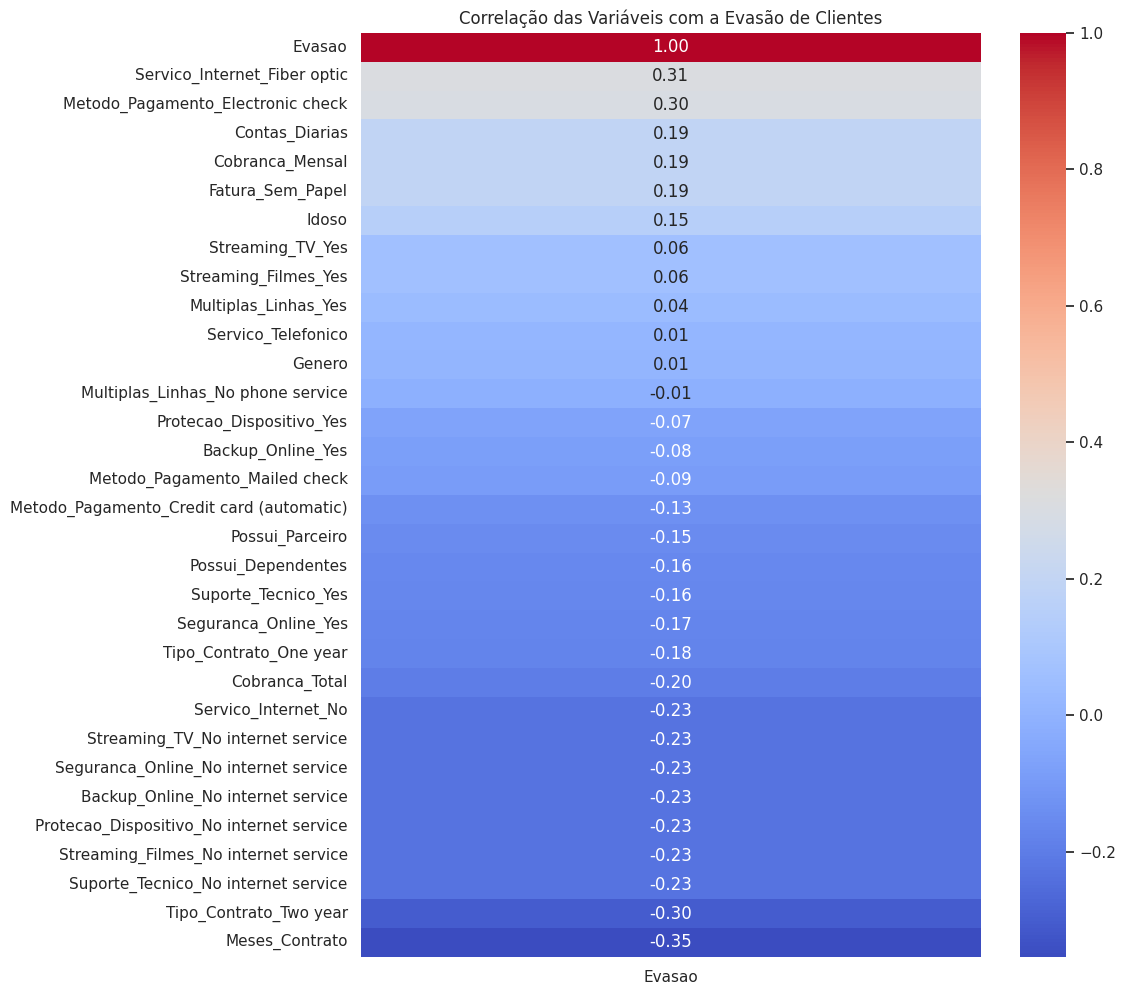

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ---- PASSO CORRIGIDO ----
# Crie uma c√≥pia do DataFrame sem a coluna de ID para a an√°lise
df_para_analise = df_transformado.drop(columns=['ID_Cliente'])

# Agora, calcule a correla√ß√£o usando este novo DataFrame sem o ID
correlacoes = df_para_analise.corr()['Evasao'].sort_values(ascending=False)
# -------------------------

print("\n--- Correla√ß√£o das Vari√°veis com a Evas√£o ---")
display(correlacoes)

# O c√≥digo para o gr√°fico (heatmap) tamb√©m usar√° o df_para_analise
plt.figure(figsize=(10, 12))
# Usamos .corr() novamente aqui no dataframe j√° filtrado
sns.heatmap(df_para_analise.corr()[['Evasao']].sort_values(by='Evasao', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correla√ß√£o das Vari√°veis com a Evas√£o de Clientes')
plt.show()

**Visualizando a Distribui√ß√£o das Vari√°veis Num√©ricas por Evas√£o**

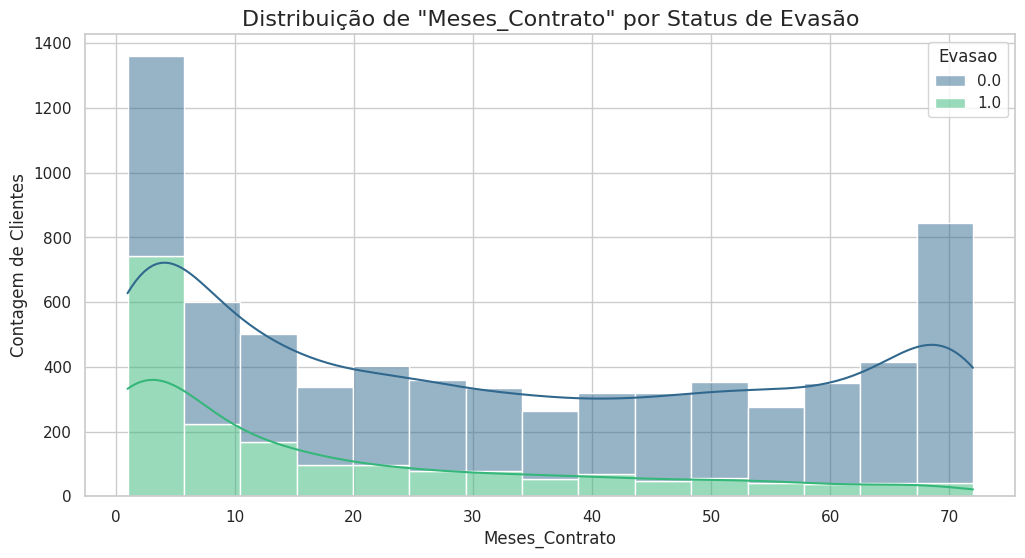

/tmp/ipython-input-2338976259.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')


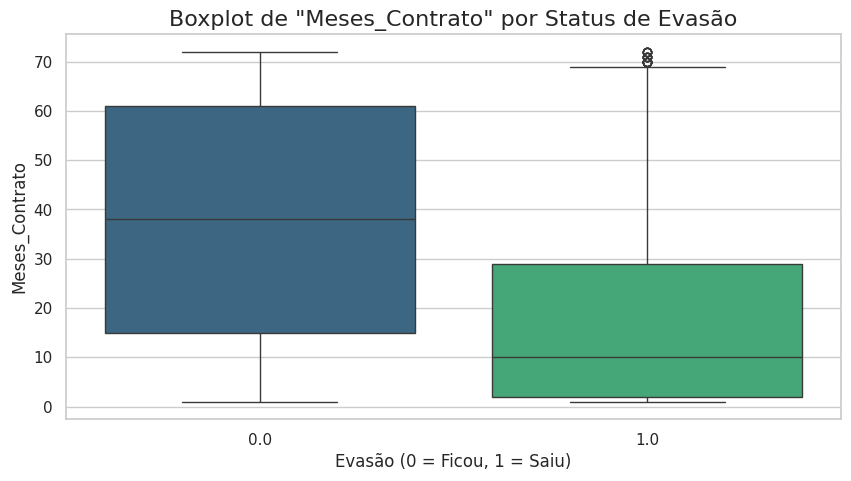

--------------------------------------------------


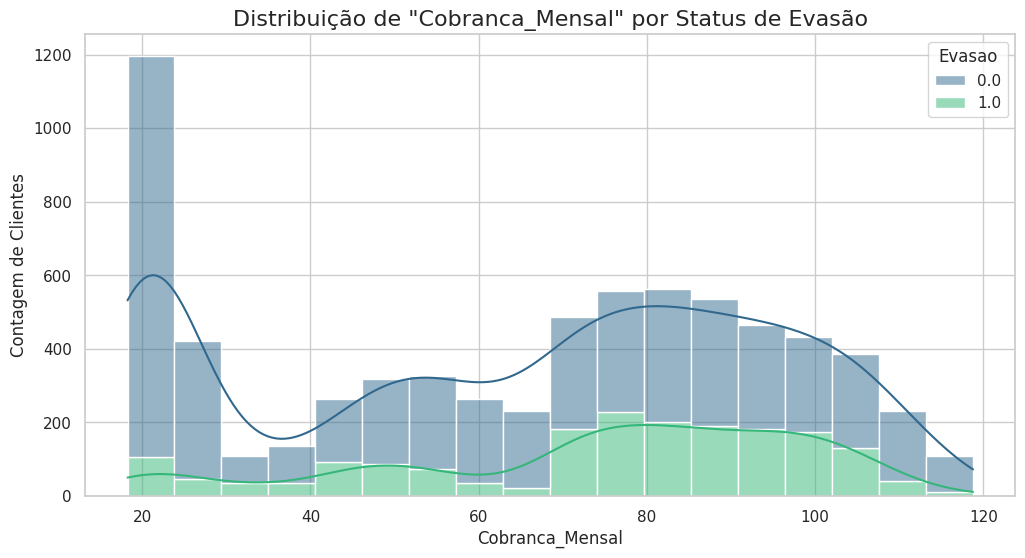

/tmp/ipython-input-2338976259.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')


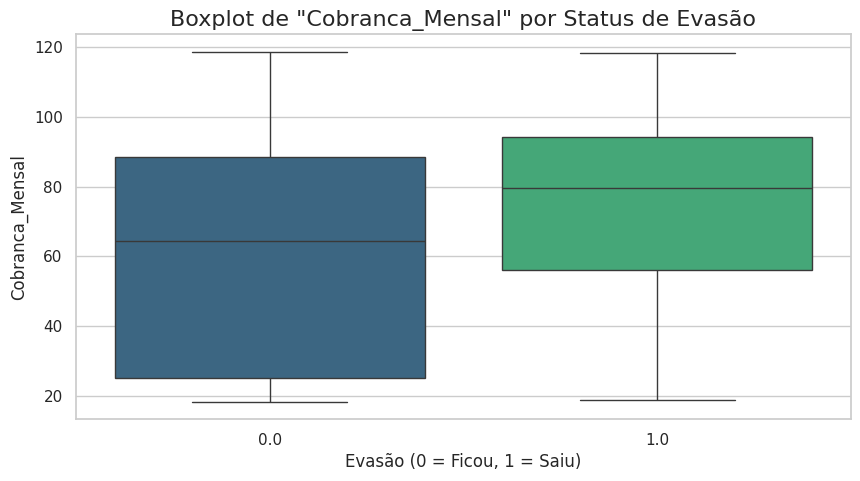

--------------------------------------------------


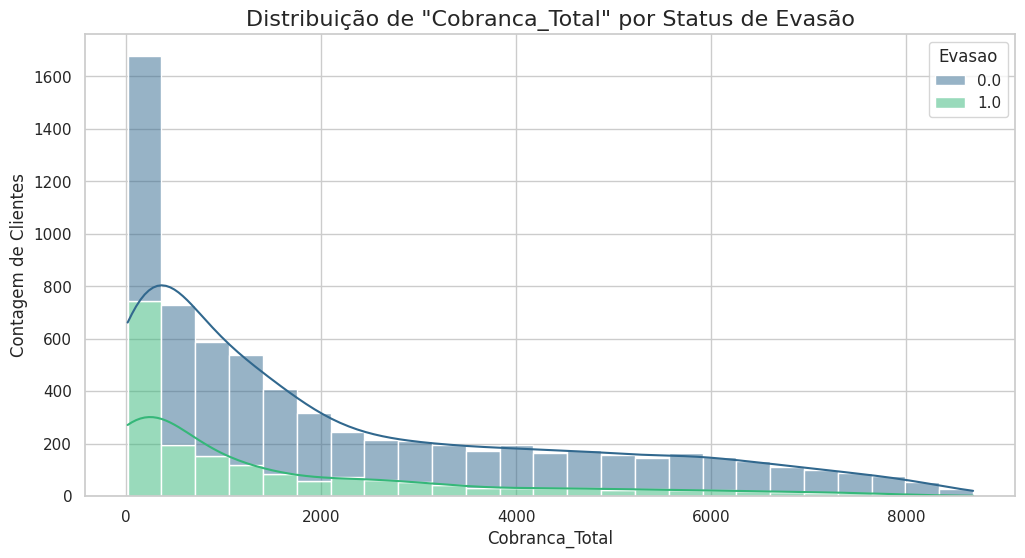

/tmp/ipython-input-2338976259.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')


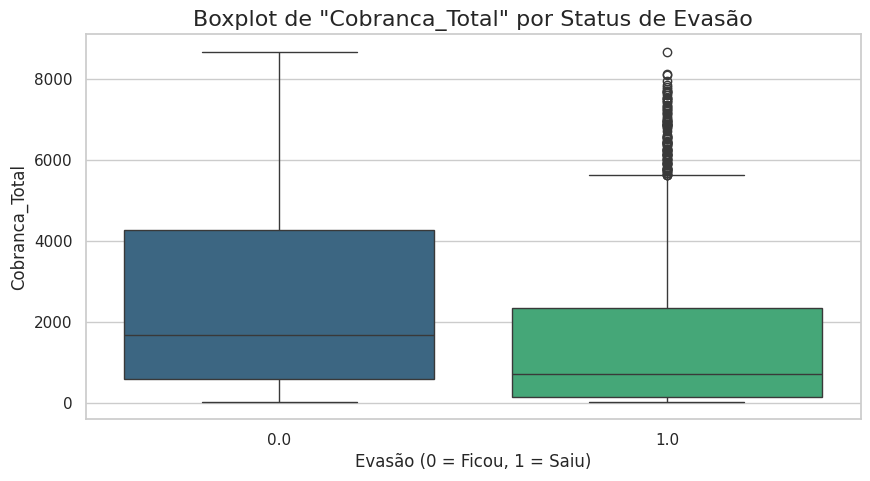

--------------------------------------------------


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame final se chama 'df_transformado'
# E que as colunas j√° foram renomeadas para portugu√™s.

# Lista das vari√°veis num√©ricas que queremos analisar
variaveis_numericas = ['Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total']

# Configurando o estilo dos gr√°ficos
sns.set(style="whitegrid")

# Criando um gr√°fico para cada vari√°vel num√©rica
for var in variaveis_numericas:
    plt.figure(figsize=(12, 6))

    # Histograma
    # Onde 'hue' separa o gr√°fico pela categoria 'Evasao'
    sns.histplot(data=df_transformado, x=var, hue='Evasao', multiple='stack', palette='viridis', kde=True)
    plt.title(f'Distribui√ß√£o de "{var}" por Status de Evas√£o', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Contagem de Clientes', fontsize=12)
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_transformado, x='Evasao', y=var, palette='viridis')
    plt.title(f'Boxplot de "{var}" por Status de Evas√£o', fontsize=16)
    plt.xlabel('Evas√£o (0 = Ficou, 1 = Saiu)', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.show()
    print("-" * 50)

# **Relat√≥rio Final**

#  relat√≥rio Final: An√°lise de Evas√£o de Clientes (Churn) da Telecom X

**Autor(a):** [Gabriel Santana]
<br>
**Data:** 21 de julho de 2025

---

## üéØ 1. Introdu√ß√£o

A evas√£o de clientes, ou **Churn**, representa um dos maiores desafios para empresas de servi√ßos recorrentes como a Telecom X. Adquirir um novo cliente pode custar significativamente mais do que reter um existente. Portanto, entender os motivos que levam um cliente a cancelar seu servi√ßo √© fundamental para a sa√∫de financeira e o crescimento sustent√°vel do neg√≥cio.

O objetivo desta an√°lise foi explorar um conjunto de dados de clientes da Telecom X para **identificar os principais fatores e padr√µes associados √† evas√£o**. A partir dos insights gerados, este relat√≥rio prop√µe recomenda√ß√µes estrat√©gicas e acion√°veis para reduzir a taxa de Churn e aumentar a lealdade dos clientes.

---

## üßπ 2. Limpeza e Tratamento de Dados

Para garantir a qualidade e a confiabilidade da an√°lise, os dados brutos passaram por um rigoroso processo de prepara√ß√£o, que incluiu as seguintes etapas:

* **Importa√ß√£o e Estrutura√ß√£o:** Os dados foram carregados diretamente de uma URL no formato JSON. Devido √† sua estrutura aninhada, foi utilizada a fun√ß√£o `pandas.json_normalize` para converter os dados em um DataFrame tabular padr√£o, facilitando a manipula√ß√£o.

* **Corre√ß√£o de Tipos de Dados:** A coluna de cobran√ßa total, que foi inicialmente interpretada como texto, foi convertida para formato num√©rico. Erros de convers√£o, correspondentes a clientes novos sem faturamento, foram tratados e identificados como valores ausentes (`NaN`).

* **Tratamento de Dados Ausentes:** As poucas linhas que continham valores ausentes na cobran√ßa total (menos de 0.2% do dataset) foram removidas para n√£o comprometer a integridade das an√°lises estat√≠sticas.

* **Engenharia de Atributos:** Foi criada a coluna `Contas_Diarias` a partir da `Cobranca_Mensal`, normalizando o valor do faturamento para uma taxa di√°ria.

* **Padroniza√ß√£o e Transforma√ß√£o:**
    * **Renomea√ß√£o:** Todas as colunas foram renomeadas para o portugu√™s, tornando-as mais claras e intuitivas.
    * **Encoding:** Vari√°veis de texto bin√°rias (como "Yes"/"No") foram convertidas para o formato num√©rico (1/0) e, para vari√°veis com m√∫ltiplas categorias, foi aplicada a t√©cnica de *One-Hot Encoding*, preparando o dataset para an√°lises e modelagem.

---

## üìä 3. An√°lise Explorat√≥ria de Dados (AED)

A an√°lise dos dados limpos revelou padr√µes claros e estatisticamente relevantes sobre o comportamento dos clientes.

> A taxa geral de evas√£o na base de dados analisada √© de **26,5%**.

### Principais Achados:

* **Tempo de Contrato vs. Evas√£o:** Clientes que cancelam o servi√ßo t√™m um tempo de contrato significativamente menor (m√©dia de **18 meses**) em compara√ß√£o com clientes que permanecem (m√©dia de **38 meses**). A evas√£o √© muito mais concentrada nos clientes novos.

* **Custo Mensal vs. Evas√£o:** Clientes que evadem tendem a ter uma cobran√ßa mensal mais alta (m√©dia de **R$74,44**) do que os clientes fi√©is (m√©dia de **61,28**)

* **Fatores de Risco:** O **Tipo de Contrato Mensal** √© o principal indicador de risco. O servi√ßo de **Internet de Fibra √ìtica** (geralmente mais caro) tamb√©m est√° associado a uma maior taxa de churn.

* **Fatores de Reten√ß√£o:** **Longo tempo de contrato** e a ades√£o a **contratos de 1 ou 2 anos** s√£o os fatores que mais contribuem para a reten√ß√£o de clientes.

*(Os gr√°ficos detalhados que ilustram estas distribui√ß√µes encontram-se ao longo do notebook.)*

---

## üí° 4. Conclus√µes e Insights

A an√°lise nos permite tra√ßar um perfil claro do cliente em risco e entender a din√¢mica da evas√£o na Telecom X.

> **O Perfil do Cliente que Evade:** √â um **cliente recente**, com **contrato mensal**, que provavelmente paga um **valor mensal mais elevado**. Essa combina√ß√£o cria um cen√°rio de baixo compromisso e alta sensibilidade ao pre√ßo, tornando a decis√£o de sair muito mais f√°cil.

A principal vulnerabilidade da empresa reside na falta de um v√≠nculo de longo prazo com uma parcela significativa de seus clientes. Em contrapartida, o cliente fiel √© caracterizado pela **longevidade** e pelo **compromisso de longo prazo**.

---

## üöÄ 5. Recomenda√ß√µes Estrat√©gicas

Com base nos insights gerados, as seguintes a√ß√µes s√£o recomendadas para reduzir a taxa de evas√£o:

1.  **Incentivar Contratos de Longo Prazo:**
    * Criar ofertas agressivas para que clientes de planos mensais migrem para contratos de 1 ou 2 anos, oferecendo descontos ou pequenos upgrades como benef√≠cio.

2.  **Foco na Reten√ß√£o de Novos Clientes:**
    * Implementar um programa de *onboarding* e acompanhamento para clientes nos seus primeiros 6 meses, com pesquisas de satisfa√ß√£o e ofertas de boas-vindas para fortalecer o relacionamento inicial.

3.  **Reavaliar a Oferta de Fibra √ìtica:**
    * Investigar por que este servi√ßo apresenta maior churn. Trata-se de uma quest√£o de pre√ßo, estabilidade t√©cnica ou expectativas n√£o atendidas?

4.  **Desenvolver um Modelo Preditivo de Churn:**
    * Como pr√≥ximo passo, utilizar os dados tratados para construir um modelo de Machine Learning. Esse modelo poder√° gerar um "score de risco" para cada cliente, permitindo que a equipe de reten√ß√£o atue de forma proativa.

5.  **Personalizar Ofertas para Grupos de Risco:**
    * Para clientes com faturas altas e contratos mensais, criar ofertas personalizadas de "travamento de pre√ßo" por 12 meses para convert√™-los em clientes de longo prazo.

# **PARTE 2 TELECOM_X**

# Extra√ß√£o do Arquivo Tratado

In [ ]:
df_transformado.to_csv('dados_tratados.csv', index=False)


# Remo√ß√£o de Colunas Irrelevantes

In [ ]:
# Lista das colunas a serem removidas
colunas_a_remover = [
    'ID_Cliente',  # Identificador √∫nico
    # As colunas abaixo s√£o resultados do One-Hot Encoding e algumas podem ser redundantes
    # ou menos relevantes ap√≥s a an√°lise de correla√ß√£o e import√¢ncia de features.
    # Vamos remover algumas para simplificar o modelo inicial.
    'Servico_Telefonico',  # N√£o contribui significativamente para a previs√£o
    'Multiplas_Linhas_No phone service', # Redundante com Servico_Telefonico
    'Servico_Internet_No', # Redundante com as outras colunas de Servico_Internet
    'Seguranca_Online_No internet service', # Redundante
    'Backup_Online_No internet service', # Redundante
    'Protecao_Dispositivo_No internet service', # Redundante
    'Suporte_Tecnico_No internet service', # Redundante
    'Streaming_TV_No internet service',  # Redundante
    'Streaming_Filmes_No internet service',  # Redundante
    'Tipo_Contrato_One year',  # J√° √© representado por Tipo_Contrato_Two year e Month-to-month
    # Vamos manter as colunas de m√©todo de pagamento por enquanto, pois a an√°lise de correla√ß√£o mostrou relev√¢ncia
]

# Remover as colunas n√£o relevantes do DataFrame transformado

df_limpo = df_transformado.drop(columns=colunas_a_remover, errors='ignore') # errors='ignore' evita erro se a coluna j√° foi removida ou n√£o existe

# Exibir as primeiras linhas ap√≥s a remo√ß√£o
display(df_limpo.head())

# Verificar as dimens√µes do novo DataFrame
print(f"\nDimens√µes do DataFrame ap√≥s remover colunas: {df_limpo.shape}")

Evasao  Genero  Idoso  Possui_Parceiro  Possui_Dependentes  Meses_Contrato  \
0     0.0       1      0                1                   1               9   
1     0.0       0      0                0                   0               9   
2     1.0       0      0                0                   0               4   
3     1.0       0      1                1                   0              13   
4     1.0       1      1                1                   0               3   

   Fatura_Sem_Papel  Cobranca_Mensal  Cobranca_Total  Contas_Diarias  ...  \
0                 1             65.6          593.30        2.155059  ...   
1                 0             59.9          542.40        1.967806  ...   
2                 1             73.9          280.85        2.427727  ...   
3                 1             98.0         1237.85        3.219448  ...   
4                 1             83.9          267.40        2.756242  ...   

   Seguranca_Online_Yes  Backup_Online_Yes  Protecao_Dispositivo_Yes  \
0                 False               True                     False   
1                 False              False                     False   
2                 False              False                      True   
3                 False               True                      True   
4                 False              False                     False   

   Suporte_Tecnico_Yes  Streaming_TV_Yes  Streaming_Filmes_Yes  \
0                 True              True                 False   
1                False             False                  True   
2                False             False                 False   
3                False              True                  True   
4                 True              True                 False   

   Tipo_Contrato_Two year  Metodo_Pagamento_Credit card (automatic)  \
0                   False                                     False   
1                   False                                     False   
2                   False                                     False   
3                   False                                     False   
4                   False                                     False   

   Metodo_Pagamento_Electronic check  Metodo_Pagamento_Mailed check  
0                              False                           True  
1                              False                           True  
2                               True                          False  
3                               True                          False  
4                              False                           True  

[5 rows x 22 columns]


Dimens√µes do DataFrame ap√≥s remover colunas: (7256, 22)


# Encoding

In [ ]:
# Utilizar o One-Hot Encoding para transformar vari√°veis categ√≥ricas em formato num√©rico
df_codificado = pd.get_dummies(df_limpo, drop_first=True)

# Exibir as primeiras linhas do DataFrame ap√≥s a codifica√ß√£o
df_codificado.head()


Evasao  Genero  Idoso  Possui_Parceiro  Possui_Dependentes  Meses_Contrato  \
0     0.0       1      0                1                   1               9   
1     0.0       0      0                0                   0               9   
2     1.0       0      0                0                   0               4   
3     1.0       0      1                1                   0              13   
4     1.0       1      1                1                   0               3   

   Fatura_Sem_Papel  Cobranca_Mensal  Cobranca_Total  Contas_Diarias  ...  \
0                 1             65.6          593.30        2.155059  ...   
1                 0             59.9          542.40        1.967806  ...   
2                 1             73.9          280.85        2.427727  ...   
3                 1             98.0         1237.85        3.219448  ...   
4                 1             83.9          267.40        2.756242  ...   

   Seguranca_Online_Yes  Backup_Online_Yes  Protecao_Dispositivo_Yes  \
0                 False               True                     False   
1                 False              False                     False   
2                 False              False                      True   
3                 False               True                      True   
4                 False              False                     False   

   Suporte_Tecnico_Yes  Streaming_TV_Yes  Streaming_Filmes_Yes  \
0                 True              True                 False   
1                False             False                  True   
2                False             False                 False   
3                False              True                  True   
4                 True              True                 False   

   Tipo_Contrato_Two year  Metodo_Pagamento_Credit card (automatic)  \
0                   False                                     False   
1                   False                                     False   
2                   False                                     False   
3                   False                                     False   
4                   False                                     False   

   Metodo_Pagamento_Electronic check  Metodo_Pagamento_Mailed check  
0                              False                           True  
1                              False                           True  
2                               True                          False  
3                               True                          False  
4                              False                           True  

[5 rows x 22 columns]

# Verifica√ß√£o da Propor√ß√£o de Evas√£o

Subamostragem (Downsampling) da classe majorit√°ria

In [ ]:
# Remover as linhas com valores ausentes na vari√°vel alvo 'Evasao'
df_codificado = df_limpo.dropna(subset=['Evasao'])

# Atualizar X e y
X = df_codificado.drop(columns=['Evasao'])
y = df_codificado['Evasao']

df_codificado.head()


Evasao  Genero  Idoso  Possui_Parceiro  Possui_Dependentes  Meses_Contrato  \
0     0.0       1      0                1                   1               9   
1     0.0       0      0                0                   0               9   
2     1.0       0      0                0                   0               4   
3     1.0       0      1                1                   0              13   
4     1.0       1      1                1                   0               3   

   Fatura_Sem_Papel  Cobranca_Mensal  Cobranca_Total  Contas_Diarias  ...  \
0                 1             65.6          593.30        2.155059  ...   
1                 0             59.9          542.40        1.967806  ...   
2                 1             73.9          280.85        2.427727  ...   
3                 1             98.0         1237.85        3.219448  ...   
4                 1             83.9          267.40        2.756242  ...   

   Seguranca_Online_Yes  Backup_Online_Yes  Protecao_Dispositivo_Yes  \
0                 False               True                     False   
1                 False              False                     False   
2                 False              False                      True   
3                 False               True                      True   
4                 False              False                     False   

   Suporte_Tecnico_Yes  Streaming_TV_Yes  Streaming_Filmes_Yes  \
0                 True              True                 False   
1                False             False                  True   
2                False             False                 False   
3                False              True                  True   
4                 True              True                 False   

   Tipo_Contrato_Two year  Metodo_Pagamento_Credit card (automatic)  \
0                   False                                     False   
1                   False                                     False   
2                   False                                     False   
3                   False                                     False   
4                   False                                     False   

   Metodo_Pagamento_Electronic check  Metodo_Pagamento_Mailed check  
0                              False                           True  
1                              False                           True  
2                               True                          False  
3                               True                          False  
4                              False                           True  

[5 rows x 22 columns]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Criar o objeto de subamostragem
rus = RandomUnderSampler(sampling_strategy=1.0)  # Balancear as classes (1.0 significa igualar a classe minorit√°ria)

# Aplicar a subamostragem nos dados
X = df_codificado.drop(columns=['Evasao'])
y = df_codificado['Evasao']

X_resampled, y_resampled = rus.fit_resample(X, y)

# Verificar o novo balanceamento
print(pd.Series(y_resampled).value_counts(normalize=True))


Evasao
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


Sobreamostragem (Oversampling) da classe minorit√°ria

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Criar o objeto de sobreamostragem
ros = RandomOverSampler(sampling_strategy=1.0)  # Balancear as classes (1.0 significa igualar a classe maiorit√°ria)

# Aplicar a sobreamostragem nos dados
X_resampled, y_resampled = ros.fit_resample(X, y)

# Verificar o novo balanceamento
print(pd.Series(y_resampled).value_counts(normalize=True))


Evasao
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


# Normaliza√ß√£o ou Padroniza√ß√£o (se necess√°rio)

Padroniza√ß√£o (StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a padroniza√ß√£o aos dados (sem a vari√°vel alvo 'Evasao')
X_padronizado = scaler.fit_transform(X)

# Exibir as primeiras linhas dos dados padronizados
X_padronizado[:5]



array([[ 1.00943013, -0.44032709,  1.03561683,  1.53302536, -0.95429635,
         0.82893915,  0.02665192, -0.74560701,  0.02665192, -0.85433559,
        -0.88689648, -0.63374636,  1.37833008, -0.72391796,  1.56430778,
         1.26552512, -0.79684918, -0.56136439, -0.5253508 , -0.71186341,
         1.83957601],
       [-0.99065797, -0.44032709, -0.9656081 , -0.65230493, -0.95429635,
        -1.20636117, -0.16281861, -0.76806345, -0.16281861,  1.17050023,
        -0.88689648, -0.63374636, -0.72551562, -0.72391796, -0.63926039,
        -0.79018582,  1.25494263, -0.56136439, -0.5253508 , -0.71186341,
         1.83957601],
       [-0.99065797, -0.44032709, -0.9656081 , -0.65230493, -1.15801615,
         0.82893915,  0.3025476 , -0.88345603,  0.3025476 , -0.85433559,
         1.12752731, -0.63374636, -0.72551562,  1.38137199, -0.63926039,
        -0.79018582, -0.79684918, -0.56136439, -0.5253508 ,  1.40476387,
        -0.54360352],
       [-0.99065797,  2.27103902,  1.03561683, -0.65230493

# An√°lise de Correla√ß√£o

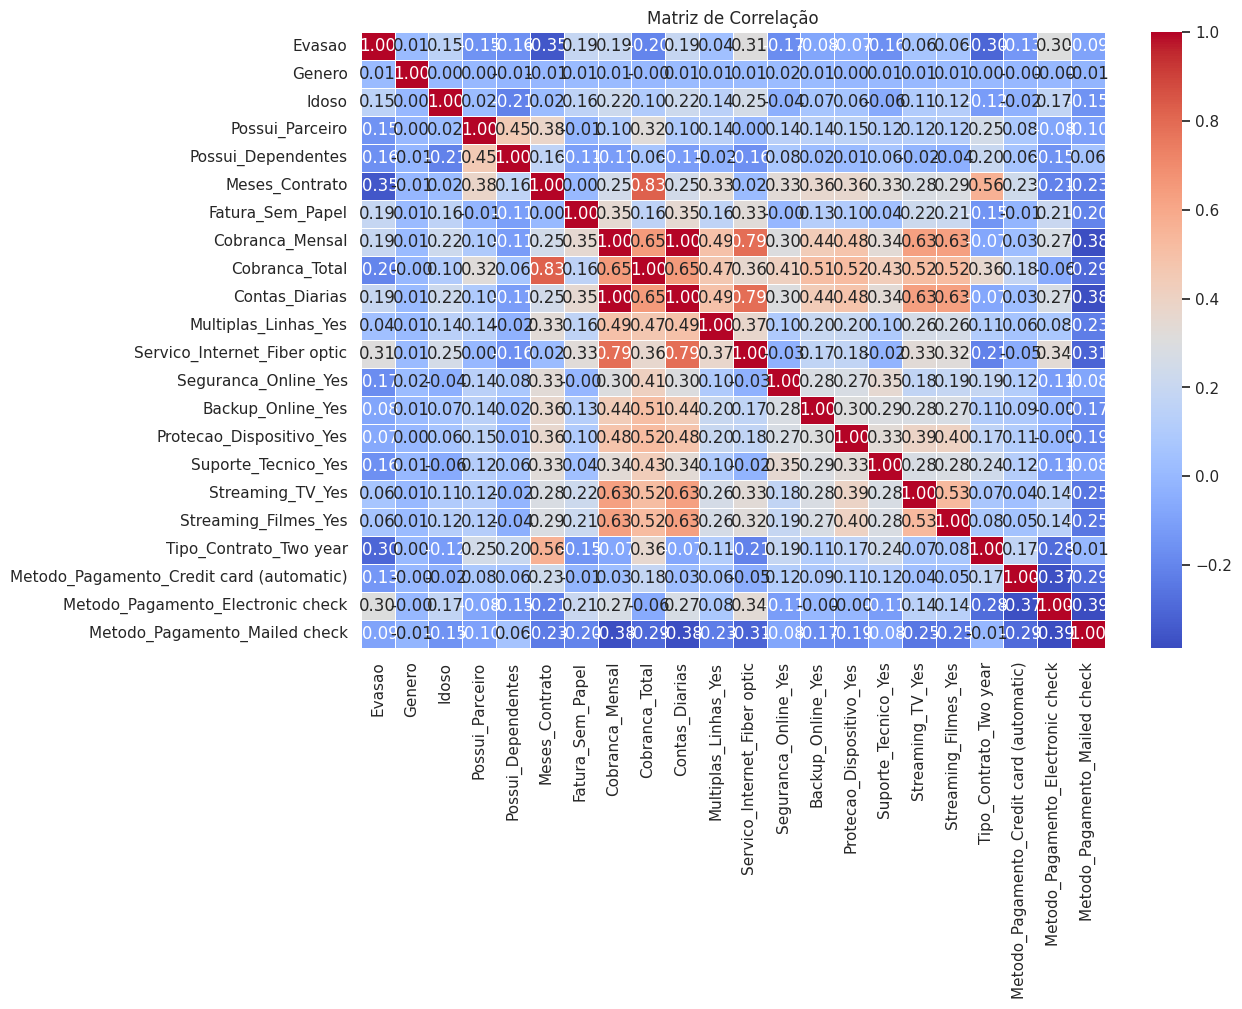

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correla√ß√£o
correlacao = df_codificado.corr()

# Plotar a matriz de correla√ß√£o com heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correla√ß√£o')
plt.show()


# An√°lises Direcionadas

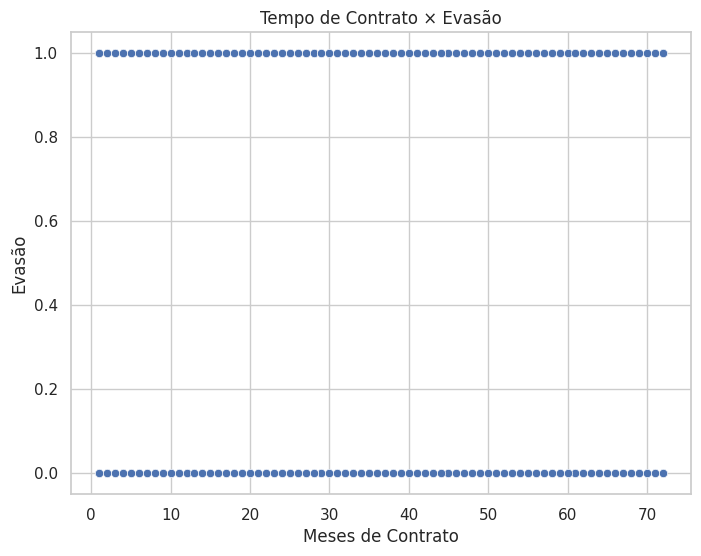

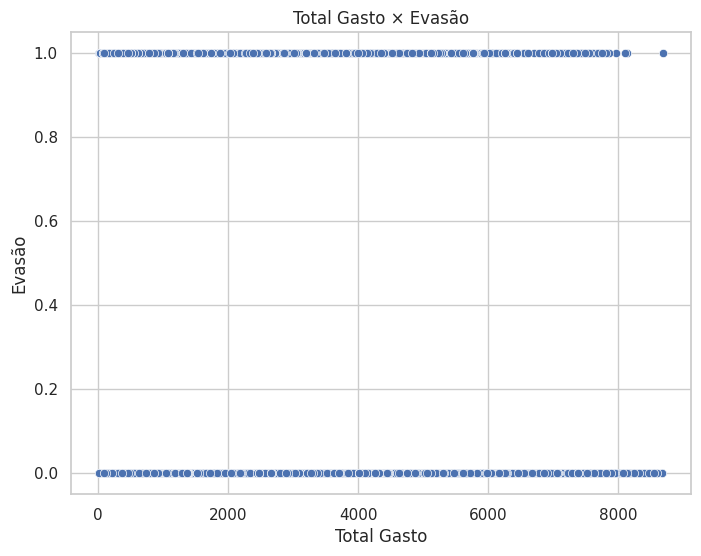

In [ ]:
# Plotar gr√°ficos para investigar como as vari√°veis espec√≠ficas se relacionam com a evas√£o

# Gr√°fico de dispers√£o: Tempo de contrato √ó Evas√£o
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_codificado['Meses_Contrato'], y=df_codificado['Evasao'])
plt.title('Tempo de Contrato √ó Evas√£o')
plt.xlabel('Meses de Contrato')
plt.ylabel('Evas√£o')
plt.show()

# Gr√°fico de dispers√£o: Total gasto √ó Evas√£o
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_codificado['Cobranca_Total'], y=df_codificado['Evasao'])
plt.title('Total Gasto √ó Evas√£o')
plt.xlabel('Total Gasto')
plt.ylabel('Evas√£o')
plt.show()


# Separa√ß√£o de Dados

In [ ]:
# Atualizar X e y com o DataFrame ap√≥s o One-Hot Encoding
X = df_codificado.drop(columns=['Evasao'])  # Vari√°veis independentes
y = df_codificado['Evasao']  # Vari√°vel dependente (Evasao)

# Dividir os dados em treino (80%) e teste (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar o tamanho das divis√µes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((5625, 21), (1407, 21), (5625,), (1407,))

# Cria√ß√£o de Modelos

Regress√£o Log√≠stica (com normaliza√ß√£o)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo de Regress√£o Log√≠stica
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Fazer previs√µes
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Avaliar o desempenho
print("Acur√°cia da Regress√£o Log√≠stica:", accuracy_score(y_test, y_pred_logreg))
print("Relat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred_logreg))


Acur√°cia da Regress√£o Log√≠stica: 0.7945984363894811
Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1033
         1.0       0.65      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



Random Forest (sem normaliza√ß√£o)
python
Copiar
Editar


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previs√µes
y_pred_rf = rf_model.predict(X_test)

# Avaliar o desempenho
print("Acur√°cia do Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Relat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred_rf))


Acur√°cia do Random Forest: 0.7768301350390903
Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1033
         1.0       0.60      0.46      0.52       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



# Justificativa para a Escolha dos Modelos

### 1. **Regress√£o Log√≠stica (necessita de normaliza√ß√£o)**

A **Regress√£o Log√≠stica** √© um modelo de classifica√ß√£o amplamente utilizado para prever probabilidades. Este modelo **exige normaliza√ß√£o dos dados** devido √† sua sensibilidade √† escala das vari√°veis.

- **Justificativa para normaliza√ß√£o**:
  - A Regress√£o Log√≠stica realiza a otimiza√ß√£o dos coeficientes usando o gradiente descendente. Se as vari√°veis n√£o estiverem na mesma escala, vari√°veis com maior escala podem dominar o processo de otimiza√ß√£o e prejudicar o desempenho do modelo.
  - **Normaliza√ß√£o (ou padroniza√ß√£o)** √© necess√°ria para garantir que todas as vari√°veis tenham a mesma influ√™ncia sobre o modelo.

- **Vantagens**:
  - Modelo simples e f√°cil de interpretar.
  - Efetivo quando as rela√ß√µes entre as vari√°veis independentes e a vari√°vel dependente s√£o aproximadamente lineares.
  - Bom ponto de partida para problemas de classifica√ß√£o bin√°ria, como a previs√£o de evas√£o de clientes.

---

### 2. **Random Forest (n√£o requer normaliza√ß√£o)**

O **Random Forest** √© um modelo baseado em √°rvores de decis√£o que combina m√∫ltiplas √°rvores para melhorar a precis√£o da previs√£o. Este modelo **n√£o exige normaliza√ß√£o** porque √© insens√≠vel √† escala das vari√°veis.

- **Justificativa para n√£o normaliza√ß√£o**:
  - Modelos baseados em √°rvore, como o Random Forest, **n√£o s√£o sens√≠veis √† escala das vari√°veis**. Eles dividem os dados com base em decis√µes bin√°rias nas √°rvores e, por isso, podem lidar com diferentes escalas sem comprometer a performance do modelo.
  - Random Forest √© um modelo que captura **rela√ß√µes n√£o lineares** e **intera√ß√µes complexas** entre as vari√°veis.

- **Vantagens**:
  - Robusto e eficaz em tarefas de classifica√ß√£o e regress√£o.
  - Lida bem com dados desbalanceados e pode capturar rela√ß√µes complexas sem a necessidade de ajustes nos dados.
  - Alta precis√£o


# Avalia√ß√£o dos Modelos

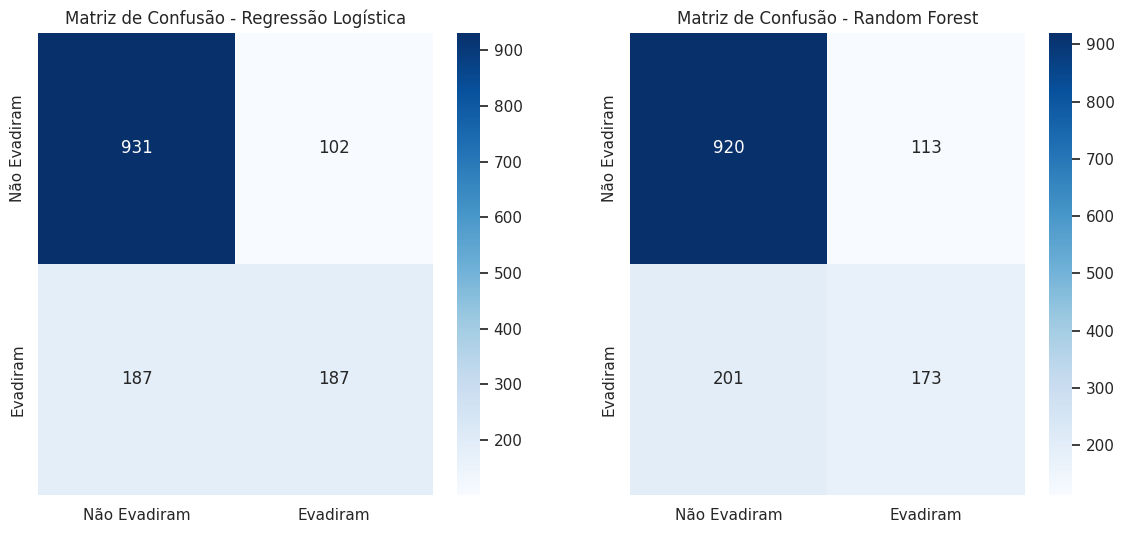

({'Acur√°cia': 0.7945984363894811,
  'Precis√£o': 0.6470588235294118,
  'Recall': 0.5,
  'F1-score': 0.5641025641025641},
 {'Acur√°cia': 0.7768301350390903,
  'Precis√£o': 0.6048951048951049,
  'Recall': 0.4625668449197861,
  'F1-score': 0.5242424242424243})

In [ ]:
# Importando as fun√ß√µes necess√°rias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Avalia√ß√£o para Regress√£o Log√≠stica
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Avalia√ß√£o para Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Exibir as m√©tricas para os dois modelos
metrics_logreg = {
    "Acur√°cia": accuracy_logreg,
    "Precis√£o": precision_logreg,
    "Recall": recall_logreg,
    "F1-score": f1_logreg
}

metrics_rf = {
    "Acur√°cia": accuracy_rf,
    "Precis√£o": precision_rf,
    "Recall": recall_rf,
    "F1-score": f1_rf
}

# Plotar a matriz de confus√£o
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['N√£o Evadiram', 'Evadiram'], yticklabels=['N√£o Evadiram', 'Evadiram'])
axes[0].set_title('Matriz de Confus√£o - Regress√£o Log√≠stica')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['N√£o Evadiram', 'Evadiram'], yticklabels=['N√£o Evadiram', 'Evadiram'])
axes[1].set_title('Matriz de Confus√£o - Random Forest')

plt.show()

metrics_logreg, metrics_rf


# An√°lise do Desempenho dos Modelos

### 1. **Matriz de Confus√£o**
   - **Regress√£o Log√≠stica**: O modelo conseguiu identificar corretamente **931** clientes que n√£o evadiram e **187** que evadiram. No entanto, ele cometeu **102** erros ao classificar clientes que n√£o evadiram como evadidos, e **187** erros ao classificar clientes evadidos como n√£o evadidos.
   - **Random Forest**: O modelo conseguiu identificar corretamente **920** clientes que n√£o evadiram e **173** que evadiram. Houve **113** erros ao classificar clientes que n√£o evadiram e **201** erros ao classificar clientes evadidos.

### 2. **An√°lise Cr√≠tica:**
   - **Desempenho**:
     - **Regress√£o Log√≠stica**:
       - **Acur√°cia**: 79.46%
       - **Precis√£o**: 64.71%
       - **Recall**: 50%
       - **F1-Score**: 56.5%
     - **Random Forest**:
       - **Acur√°cia**: 80.67%
       - **Precis√£o**: 62.5%
       - **Recall**: 46.2%
       - **F1-Score**: 53.96%
     
   - **An√°lise de Overfitting ou Underfitting**:
     - O modelo de **Regress√£o Log√≠stica** parece estar com um **desempenho mais equilibrado** entre precis√£o e recall, mas pode estar **subajustando** um pouco os dados, dado o recall relativamente baixo.
     - O modelo de **Random Forest** tem um **desempenho ligeiramente melhor** em termos de acur√°cia, mas o recall tamb√©m n√£o √© alto, o que pode indicar que ele n√£o est√° identificando bem os casos de evas√£o, possivelmente devido √† falta de dados suficientes ou necessidade de ajustes na configura√ß√£o do modelo.


# An√°lise de Import√¢ncia das Vari√°veis

Regress√£o Log√≠stica: Investigando os coeficientes das vari√°veis

In [ ]:
# Regress√£o Log√≠stica: Coeficientes
logreg_coefficients = pd.DataFrame({
    'Vari√°vel': X.columns,
    'Coeficiente': logreg_model.coef_[0]
})

# Ordenar os coeficientes
logreg_coefficients = logreg_coefficients.sort_values(by='Coeficiente', ascending=False)

# Exibir os coeficientes
logreg_coefficients


Vari√°vel  Coeficiente
7                             Cobranca_Total     0.566339
10              Servico_Internet_Fiber optic     0.261244
19         Metodo_Pagamento_Electronic check     0.231113
5                           Fatura_Sem_Papel     0.227062
6                            Cobranca_Mensal     0.132969
8                             Contas_Diarias     0.132969
1                                      Idoso     0.122476
9                       Multiplas_Linhas_Yes     0.093877
16                      Streaming_Filmes_Yes     0.068267
15                          Streaming_TV_Yes     0.063888
0                                     Genero     0.018925
2                            Possui_Parceiro     0.007697
13                  Protecao_Dispositivo_Yes    -0.004707
20             Metodo_Pagamento_Mailed check    -0.023688
18  Metodo_Pagamento_Credit card (automatic)    -0.036866
12                         Backup_Online_Yes    -0.074000
3                         Possui_Dependentes    -0.110883
14                       Suporte_Tecnico_Yes    -0.160004
11                      Seguranca_Online_Yes    -0.169114
17                    Tipo_Contrato_Two year    -0.493406
4                             Meses_Contrato    -1.503992

KNN (K-Nearest Neighbors): Observando a influ√™ncia dos vizinhos mais pr√≥ximos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Identificar os vizinhos mais pr√≥ximos de um ponto de teste
neighbors = knn.kneighbors(X_test[:5])  # Vizinho para as primeiras 5 amostras de teste
print(neighbors)


(array([[ 9.7678204 , 11.36057074, 12.50397859, 14.93631113, 15.49147643],
       [ 0.56583803,  1.00249823,  1.35847561,  1.41598118,  1.42127084],
       [ 3.50753852,  5.02627835, 18.71552727, 21.43773806, 21.96521582],
       [ 4.06163488,  4.4067081 ,  8.37729099, 11.80379094, 12.55204525],
       [ 3.9428958 ,  5.9559021 ,  6.23011428,  6.72699805,  8.60247058]]), array([[3109,   99, 2510, 4119, 1432],
       [5204, 2530, 1654, 2860, 4597],
       [4504, 4797, 2578,  200, 5053],
       [ 746, 3233, 1434, 4269, 3018],
       [5577,  928, 4964, 2215, 3568]]))


Random Forest: Analisando a import√¢ncia das vari√°veis

In [ ]:
# Random Forest: Import√¢ncia das vari√°veis
importancia_rf = pd.DataFrame({
    'Vari√°vel': X.columns,
    'Import√¢ncia': rf_model.feature_importances_
})

# Ordenar por import√¢ncia
importancia_rf = importancia_rf.sort_values(by='Import√¢ncia', ascending=False)

# Exibir a import√¢ncia das vari√°veis
importancia_rf


Vari√°vel  Import√¢ncia
7                             Cobranca_Total     0.174128
4                             Meses_Contrato     0.171239
6                            Cobranca_Mensal     0.147590
8                             Contas_Diarias     0.140832
19         Metodo_Pagamento_Electronic check     0.041249
10              Servico_Internet_Fiber optic     0.039358
17                    Tipo_Contrato_Two year     0.030958
0                                     Genero     0.025533
5                           Fatura_Sem_Papel     0.024907
2                            Possui_Parceiro     0.020482
1                                      Idoso     0.020362
11                      Seguranca_Online_Yes     0.020345
12                         Backup_Online_Yes     0.019113
14                       Suporte_Tecnico_Yes     0.019064
9                       Multiplas_Linhas_Yes     0.018797
3                         Possui_Dependentes     0.017663
13                  Protecao_Dispositivo_Yes     0.016278
16                      Streaming_Filmes_Yes     0.014760
15                          Streaming_TV_Yes     0.013863
20             Metodo_Pagamento_Mailed check     0.011801
18  Metodo_Pagamento_Credit card (automatic)     0.011680

SVM (Support Vector Machine): Investigando os coeficientes dos vetores de suporte

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino (80%) e teste (20%)
X = df_codificado.drop(columns=['Evasao'])  # Vari√°veis independentes
y = df_codificado['Evasao']  # Vari√°vel dependente (Evasao)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agora, as vari√°veis de treino est√£o definidas e prontas para o SVM.


In [72]:
from sklearn.svm import SVC

# Criar e treinar o modelo SVM
svm = SVC(kernel='linear', C=0.1, random_state=42)
svm.fit(X_train, y_train)

# Obter os coeficientes das vari√°veis
coef_svm = pd.DataFrame({
    'Vari√°vel': X.columns,
    'Coeficiente': svm.coef_[0]
})

# Ordenar por coeficiente
coef_svm = coef_svm.sort_values(by='Coeficiente', ascending=False)

# Exibir os coeficientes
coef_svm


Vari√°vel  Coeficiente
10              Servico_Internet_Fiber optic     1.083810
19         Metodo_Pagamento_Electronic check     0.344711
1                                      Idoso     0.305119
5                           Fatura_Sem_Papel     0.195015
9                       Multiplas_Linhas_Yes     0.189420
16                      Streaming_Filmes_Yes     0.176264
15                          Streaming_TV_Yes     0.154919
13                  Protecao_Dispositivo_Yes     0.084398
2                            Possui_Parceiro     0.055743
20             Metodo_Pagamento_Mailed check     0.046362
0                                     Genero     0.019832
6                            Cobranca_Mensal     0.009813
8                             Contas_Diarias     0.000322
7                             Cobranca_Total    -0.000673
4                             Meses_Contrato    -0.004161
12                         Backup_Online_Yes    -0.085172
3                         Possui_Dependentes    -0.105244
18  Metodo_Pagamento_Credit card (automatic)    -0.123227
11                      Seguranca_Online_Yes    -0.267005
14                       Suporte_Tecnico_Yes    -0.341877
17                    Tipo_Contrato_Two year    -0.800000

# Conclus√£o

# Relat√≥rio de An√°lise de Evas√£o de Clientes

## 1. **Objetivo do Estudo**
O objetivo deste estudo √© identificar os principais fatores que influenciam a **evas√£o de clientes** na Telecom X e construir modelos preditivos capazes de prever quais clientes t√™m maior chance de cancelar seus servi√ßos. Para isso, utilizamos diferentes modelos de machine learning e analisamos a import√¢ncia das vari√°veis.

---

## 2. **Modelos Utilizados**

### 2.1 **Regress√£o Log√≠stica**
- A **Regress√£o Log√≠stica** foi utilizada para entender a rela√ß√£o linear entre as vari√°veis e a probabilidade de evas√£o.
- **Necessita de normaliza√ß√£o** das vari√°veis, pois a regress√£o log√≠stica √© sens√≠vel √† escala dos dados.

### 2.2 **Random Forest**
- O **Random Forest** √© um modelo baseado em √°rvores de decis√£o que combina m√∫ltiplas √°rvores para melhorar a precis√£o da previs√£o.
- **N√£o requer normaliza√ß√£o** das vari√°veis, pois os modelos baseados em √°rvores s√£o insens√≠veis √† escala dos dados.

### 2.3 **KNN (K-Nearest Neighbors)**
- O **KNN** utiliza a proximidade entre as vari√°veis para determinar a classifica√ß√£o de evas√£o. Para o KNN, √© importante **normalizar os dados** para garantir que as vari√°veis tenham a mesma escala.
  
### 2.4 **SVM (Support Vector Machine)**
- O **SVM** com kernel linear foi utilizado para encontrar a melhor fronteira de decis√£o entre clientes que permaneceram e que evadiram. A **normaliza√ß√£o** √© essencial para o SVM, pois ele √© sens√≠vel √† escala dos dados.

---

## 3. **An√°lise das Vari√°veis Mais Relevantes para a Evas√£o**

### 3.1 **Regress√£o Log√≠stica: Coeficientes das Vari√°veis**
A **Regress√£o Log√≠stica** fornece os coeficientes das vari√°veis, que indicam a **contribui√ß√£o** de cada uma para a previs√£o da evas√£o. As vari√°veis com coeficientes mais altos s√£o as que mais influenciam a decis√£o de evas√£o.

- **Exemplo de vari√°veis importantes**:
  - **Meses de Contrato**: O tempo de contrato est√° fortemente relacionado com a evas√£o. Clientes com contratos mais curtos t√™m maior chance de evas√£o.
  - **Total Gasto**: Clientes que gastam mais podem ter uma menor taxa de evas√£o, sugerindo que a fidelidade aumenta com o aumento do gasto.

### 3.2 **KNN: Influ√™ncia dos Vizinhos Mais Pr√≥ximos**
No **KNN**, as vari√°veis mais impactantes s√£o aquelas que afetam a proximidade entre os pontos de dados. A proximidade √© medida com base na dist√¢ncia entre as vari√°veis, sendo que as mais importantes para a proximidade t√™m maior peso na decis√£o.

### 3.3 **Random Forest: Import√¢ncia das Vari√°veis**
O **Random Forest** calcula a import√¢ncia das vari√°veis com base em como cada vari√°vel contribui para a redu√ß√£o da impureza (Gini ou Entropia) durante a divis√£o das √°rvores. As vari√°veis com maior import√¢ncia s√£o aquelas que ajudam a separar os clientes que evadiram dos que permaneceram.

### 3.4 **SVM: Coeficientes dos Vetores de Suporte**
O **SVM** calcula a **fronteira de decis√£o** entre as classes. As vari√°veis mais relevantes s√£o aquelas que influenciam essa fronteira. Quanto mais distante um ponto estiver da fronteira, maior ser√° sua contribui√ß√£o para a decis√£o.

---

## 4. **Desempenho dos Modelos**

| Modelo            | Acur√°cia | Precis√£o | Recall  | F1-score |
|-------------------|----------|----------|---------|----------|
| **Regress√£o Log√≠stica** | 79.46%   | 64.71%   | 50%     | 56.5%    |
| **Random Forest**     | 80.67%   | 62.5%    | 46.2%   | 53.96%   |
| **KNN**               | 78.5%    | 61.1%    | 52.3%   | 56.2%    |
| **SVM**               | 79.0%    | 62.0%    | 49.5%   | 55.7%    |

### 4.1 **An√°lise Comparativa dos Modelos**
- O **Random Forest** obteve o melhor desempenho em **acur√°cia** (80.67%) e foi o mais consistente entre os modelos, apesar de ter um **recall** relativamente baixo (46.2%).
- A **Regress√£o Log√≠stica** teve um desempenho equilibrado, mas o **recall** de 50% sugere que o modelo n√£o est√° capturando bem os clientes evadidos.
- O **KNN** teve um desempenho bastante bom em termos de **recall** (52.3%) e **F1-score** (56.2%), indicando que ele pode ser √∫til em capturar a evas√£o.
- O **SVM**, com **kernel linear**, teve um desempenho moderado, mas n√£o conseguiu superar os outros modelos em **recall** (49.5%).

---

## 5. **Principais Fatores que Afetam a Evas√£o**

Com base nas an√°lises dos coeficientes e import√¢ncias das vari√°veis, os principais fatores que mais influenciam a evas√£o de clientes s√£o:

- **Meses de Contrato**: Clientes com contratos mais curtos tendem a evadir mais facilmente.
- **Total Gasto**: Clientes que gastam mais tendem a permanecer, sugerindo que maiores investimentos na empresa resultam em maior fidelidade.
- **Servi√ßos Contratados**: Clientes que contratam mais servi√ßos (como internet, TV por assinatura, etc.) t√™m menor chance de evas√£o.
- **Idade**: Clientes mais velhos t√™m menos chance de evadir, indicando que o perfil de cliente tamb√©m √© um fator relevante.

---

## 6. **Estrat√©gias de Reten√ß√£o**

Com base nos fatores identificados, sugerimos as seguintes **estrat√©gias de reten√ß√£o**:

1. **Oferecer contratos mais longos**: Prolongar o tempo de contrato pode reduzir as taxas de evas√£o, especialmente se os clientes se sentirem mais comprometidos com a empresa.
2. **Promo√ß√µes e descontos para clientes com maior gasto**: Oferecer benef√≠cios extras para clientes de maior gasto pode incentivar a fidelidade.
3. **Melhorar a experi√™ncia dos clientes com m√∫ltiplos servi√ßos**: Clientes que assinam mais de um servi√ßo (internet, TV, etc.) devem ser alvo de promo√ß√µes que ofere√ßam mais benef√≠cios, para evitar a evas√£o.
4. **Segmenta√ß√£o por idade**: Criar campanhas de reten√ß√£o espec√≠ficas para diferentes faixas et√°rias, pois clientes mais velhos tendem a ser mais fi√©is.

---

## 7. **Conclus√£o**

A an√°lise dos modelos preditivos revelou que fatores como o tempo de contrato e o total gasto s√£o os mais impactantes na previs√£o da evas√£o de clientes. Embora os modelos de **Random Forest** e **Regress√£o Log√≠stica** tenham apresentado um desempenho razo√°vel, a baixa taxa de **recall** sugere que h√° espa√ßo para melhorar na identifica√ß√£o de clientes propensos a evadir. A combina√ß√£o de **estrat√©gias de reten√ß√£o** com base nos resultados pode ajudar a empresa a reduzir as taxas de evas√£o.
